## Google Colab Setup

Run these cells if you're using Google Colab to install FragNet and its dependencies.

# FragNet Interpretability Demo

This notebook demonstrates FragNet's interpretability features, including:
- Atom-level attention weights
- Fragment-level attributions
- Connection weights between fragments
- Support for multiple property predictions (Solubility, Lipophilicity, Energy, Drug Response)

In [17]:
# Uncomment and run if using Google Colab
# !pip install -q torch torchvision torchaudio
# !pip install -q torch-geometric
# !pip install -q rdkit
# !pip install -q lmdb networkx omegaconf pandas matplotlib scikit-learn scipy tqdm tensorboard pytorch-lightning
# !pip install -q streamlit streamlit-ketcher  # Optional: only needed for Streamlit features

# Clone the FragNet repository (if not already cloned)
# !git clone https://github.com/pnnl/FragNet.git
# %cd FragNet
# !pip install -e .

In [18]:
# Core imports
import pandas as pd
from pathlib import Path
import base64

# FragNet imports
from fragnet.vizualize.viz import FragNetVizApp
from fragnet.vizualize.model import FragNetPreTrainViz
from fragnet.vizualize.model_attr import get_attr_image

# Optional Streamlit imports (only needed for Streamlit app features)
try:
    import streamlit as st
    from streamlit_ketcher import st_ketcher
    STREAMLIT_AVAILABLE = True
except ImportError:
    STREAMLIT_AVAILABLE = False
    print("Note: Streamlit not available. This is fine for Colab/Jupyter usage.")

## 1. Import Required Libraries

In [19]:
# Thanks to streamlitopedia for the following code snippet
def img_to_bytes(img_path):
    img_bytes = Path(img_path).read_bytes()
    encoded = base64.b64encode(img_bytes).decode()
    return encoded

def predict_cdrp(smiles, cell_line, cell_line_df):
    gene_expr = cell_line_df.loc[cell_line,:].values
    viz.calc_weights_cdrp(smiles, gene_expr)
    prop_prediction = -1   
    return viz, prop_prediction     

## 2. Helper Functions

Define utility functions for model loading and prediction.

In [20]:
def resolve_prop_model(prop_type):
    """
    Load the appropriate model based on property type.
    
    Args:
        prop_type: One of 'Solubility', 'Lipophilicity', or 'Energy'
    
    Returns:
        viz: FragNetVizApp instance
        prop_prediction: Predicted property value
        model_config: Path to model configuration
        chkpt_path: Path to model checkpoint
    """
    if prop_type == 'Solubility':
        model_config = '../exps/ft/pnnl_full/fragnet_hpdl_exp1s_h4pt4_10/config_exp100.yaml'
        chkpt_path = '../exps/ft/pnnl_full/fragnet_hpdl_exp1s_h4pt4_10/ft_100.pt'
        viz = FragNetVizApp(model_config, chkpt_path)
        prop_prediction = viz.calc_weights(selected)

    elif prop_type == 'Lipophilicity':
        model_config = './fragnet/exps/ft/lipo/fragnet_hpdl_exp1s_pt4_30/config_exp100.yaml'
        chkpt_path = './fragnet/exps/ft/lipo/fragnet_hpdl_exp1s_pt4_30/ft_100.pt'
        viz = FragNetVizApp(model_config, chkpt_path)
        prop_prediction = viz.calc_weights(selected)  

    elif prop_type == 'Energy':
        model_config = '../fragnet/fragnet/exps/pt/unimol_exp1s4/config.yaml'
        chkpt_path = '../fragnet/fragnet/exps/pt/unimol_exp1s4/pt.pt'
        viz = FragNetVizApp(model_config, chkpt_path, 'energy')
        prop_prediction = viz.calc_weights(selected)

    return viz, prop_prediction, model_config, chkpt_path


def resolve_DRP(smiles, cell_line, cell_line_df):
    """
    Load Drug Response Prediction (DRP) model.
    
    Args:
        smiles: SMILES string of the molecule
        cell_line: Name of the cell line
        cell_line_df: DataFrame containing gene expression data
    
    Returns:
        viz: FragNetVizApp instance
        prop_prediction: Predicted drug response
        model_config: Path to model configuration
        chkpt_path: Path to model checkpoint
    """
    model_config = '../exps/ft/gdsc/fragnet_hpdl_exp1s_pt4_30/config_exp100.yaml'
    chkpt_path = '../exps/ft/gdsc/fragnet_hpdl_exp1s_pt4_30/ft_100.pt'
    viz = FragNetVizApp(model_config, chkpt_path, 'cdrp')

    gene_expr = cell_line_df.loc[cell_line, :].values
    viz.calc_weights_cdrp(smiles, gene_expr)
    prop_prediction = -1   

    return viz, prop_prediction, model_config, chkpt_path

### Model Resolution Functions

Functions to load appropriate models based on property type.

In [21]:
# Choose property type: 'Solubility', 'Lipophilicity', or 'Energy'
prop_type = "Solubility"

# Example molecule: diphenhydramine hydrochloride
selected = 'CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]'

## 3. Configure Example

Set up the property type and example molecule for demonstration.

In [22]:
if prop_type in ["Solubility", "Lipophilicity", "Energy"]:
    viz, prop_prediction, model_config, chkpt_path = resolve_prop_model(prop_type)

/Users/pana982/FragNet/fragnet/vizualize/viz.py:568: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_checkpoint,
/Users/pana982/FragNet/

using FTHead4


100%|██████████| 1/1 [00:00<00:00, 40.87it/s]


0.025600194931030273
0.0012247562408447266


0it [00:00, ?it/s][21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:15] DEPRECATION WARNING: p

bond mask value: None
bond mask value: None
bond mask value: None
bond mask value: None


## 4. Load Model and Make Prediction

In [23]:
print(f"Predicted {prop_type}: {prop_prediction:.4f}")
prop_prediction

Predicted Solubility: -3.9508


-3.9507505893707275

### Predicted Property Value

In [24]:
# Configure visualization settings
hide_bond_weights = True
hide_atom_weights = False

# Generate atom weight visualization
png, atom_weights = viz.vizualize_atom_weights(hide_bond_weights, hide_atom_weights)

# Create DataFrame for easier viewing
attn_atoms = pd.DataFrame(atom_weights)
attn_atoms.index.rename('Atom Index', inplace=True)
attn_atoms.columns = ['Atom Weights']

## 5. Atom-Level Interpretability

Visualize attention weights at the atom level.

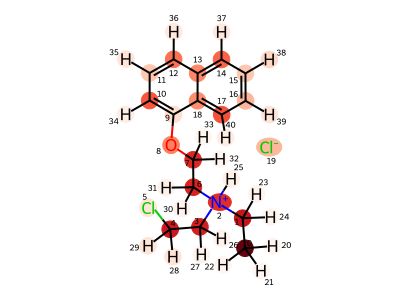

In [25]:
png

### Atom Weight Visualization

In [26]:
attn_atoms

,Atom Weights
Atom Index,
0,8.648284
1,7.188108
2,6.596669
3,6.898057
4,7.058699
5,2.980634
6,6.802766
7,6.697453
8,5.025862


### Atom Weight Values

In [27]:
# Generate fragment-level visualizations and weights
hide_bond_weights = False
png_frag_attn, png_frag_highlight, frag_w, connection_w, atoms_in_frags = viz.frag_weight_highlight()

## 6. Fragment-Level Interpretability

Analyze fragment contributions and connections.

In [28]:
# Generate attribution image
png_attr = get_attr_image(selected, model_config, chkpt_path)

# Create DataFrame showing which atoms belong to each fragment
df_atoms_in_frags = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in atoms_in_frags.items()])).T
df_atoms_in_frags.index.rename('Fragment', inplace=True)

100%|██████████| 1/1 [00:00<00:00, 25.24it/s]


0.04087400436401367
0.0013880729675292969


0it [00:00, ?it/s][21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[21:32:21] DEPRECATION WARNING: p

using FTHead4
bond mask value: None
bond mask value: None
bond mask value: None
bond mask value: None
using FTHead4
bond mask value: None
bond mask value: None
bond mask value: None
bond mask value: None


### Fragment Attribution Visualization

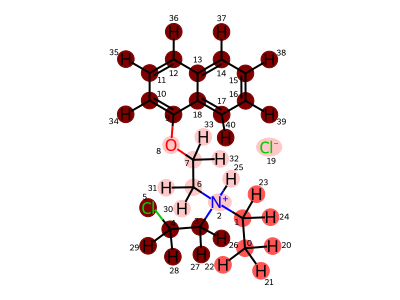

In [29]:
png_attr

### Atoms in Each Fragment

In [30]:
df_atoms_in_frags

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Fragment,,,,,,,,,,,,,,,,,
0,0.0,1.0,20.0,21.0,22.0,23.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,4.0,5.0,26.0,27.0,28.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,7.0,30.0,31.0,32.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0
6,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fragment Weight Values

Shows the importance of each molecular fragment.

In [31]:
frag_w

,fragment,weight,smiles
0,0.0,1.083533,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
1,1.0,7.635788,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
2,2.0,2.287983,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
3,3.0,2.709953,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
4,4.0,3.762446,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
5,5.0,2.466497,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
6,6.0,8.053799,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]


### Fragment Connection Weight Values

Shows the importance of connections between fragments.

In [32]:
connection_w

,connection,weight,smiles
0,"[0, 1]",7.762414,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
1,"[0, 6]",5.560195,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
2,"[1, 2]",7.762414,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
3,"[1, 3]",11.239227,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
4,"[1, 6]",7.418562,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
5,"[2, 6]",5.560194,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
6,"[3, 4]",9.798030,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
7,"[3, 6]",6.398180,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
8,"[4, 5]",6.064309,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
9,"[4, 6]",9.497845,CC[NH+](CCCl)CCOc1cccc2ccccc12.[Cl-]
